# bottom drag sensitivity

How does bottom drag affects energy distribution?

In [1]:
from glob import glob
import itertools

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

import xrft

import crocosi.postp as pp
import crocosi.gridop as gop
import crocosi.vmodes as vmd
import crocosi.plot as cplt

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster(processes=8, cores=16)
#w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:57699 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 56 Memory: 107.37 GB


---
## diagnostic flags and runs

0.00046

In [18]:
# flags
flags = {'surface': True, 'spectra': True, 'depth': True, 'vmodes': True}
overwrite=True

# paths
#root_path = '/home/c11-data/Test_aponte/fsturb/'
root_path = '/home/datawork-lops-osi/equinox/itbalt/'

M, B = [0,1], [0,1,2,3]
runs = ['fsturb_m{}_b{}_4km_0a1000j'.format(m,b) for m, b in itertools.product(M, B)]
MB = list(itertools.product(M, B))

#colors = ['k', '0.5', 'red', 'orange']
colors = cplt.get_cmap_colors(len(B))+cplt.get_cmap_colors(len(B), cmap='viridis')

_ = [print(r) for r in runs]

fsturb_m0_b0_4km_0a1000j
fsturb_m0_b1_4km_0a1000j
fsturb_m0_b2_4km_0a1000j
fsturb_m0_b3_4km_0a1000j
fsturb_m1_b0_4km_0a1000j
fsturb_m1_b1_4km_0a1000j
fsturb_m1_b2_4km_0a1000j
fsturb_m1_b3_4km_0a1000j


## Load data

In [4]:
R = [pp.Run(root_path+run, outputs=['surf', 'his'], 
            grid_periodicity=True,
           ) for run in runs
    ]

for r in R:
    r['surf'] = r['surf'].assign_coords(time=r['surf'].time_instant.chunk({'time':None}))
    r['his'] = r['his'].assign_coords(time=r['his'].time_counter.chunk({'time':None}))
    #r['surf'] = r['surf'].rename({'time_instant': 'time'})
    #r['his'] = r['his'].rename({'time_counter': 'time'})
    
#
H = float(r['grid'].h.mean().values)
tau_drag = [H/r['rdrg']/86400 for r in R] # in days
labels = ['m={} tau={:.0f}'.format(mb[0],tau) for mb, tau in zip(MB, tau_drag)]

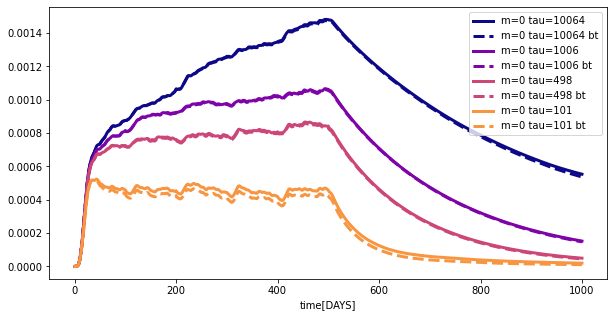

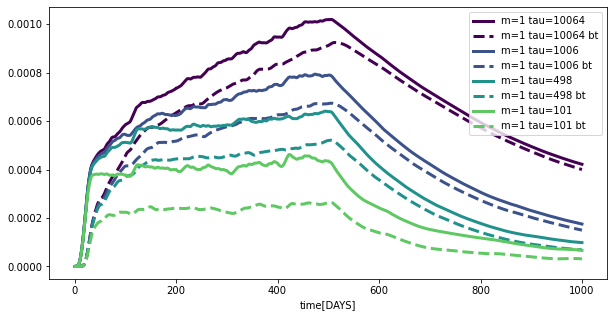

In [44]:
# quickly look at energies
fig, ax = plt.subplots(figsize=(10,5))
for r, name, mb, c in zip(R, labels, MB, colors):
    if mb[0]==0:
        r.stats['KINETIC_ENRG'].plot(ax=ax, color=c, lw=3., label=name)
        r.stats['BTKIN_ENRG'].plot(ax=ax, lw=3., color=c, ls='--', label=name+' bt')
        # ax.get_lines()[-1].get_color()
ax.legend()

fig, ax = plt.subplots(figsize=(10,5))
for r, name, mb, c in zip(R, labels, MB, colors):
    if mb[0]==1:
        r.stats['KINETIC_ENRG'].plot(ax=ax, color=c, lw=3., label=name)
        r.stats['BTKIN_ENRG'].plot(ax=ax, lw=3., color=c, ls='--', label=name+' bt')
        # ax.get_lines()[-1].get_color()
ax.legend()

Text(0.5, 1.0, 'Barotropic energy')

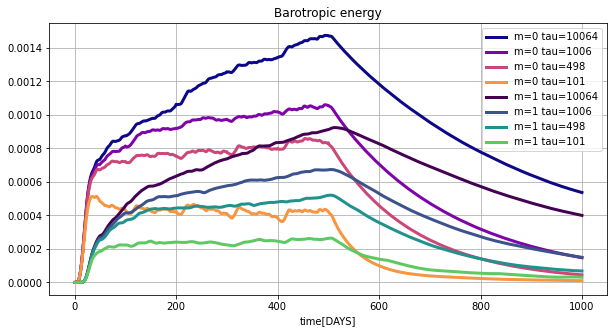

In [45]:
# barotropic energy
fig, ax = plt.subplots(figsize=(10,5))
for r, name, c in zip(R, labels, colors):
    bc_ke = r.stats['BTKIN_ENRG']
    bc_ke.plot(ax=ax, color=c, lw=3., label=name)
    #.plot(ax=ax, lw=3., color=c, ls='--', label=name)
    # ax.get_lines()[-1].get_color()
ax.legend()
ax.grid()
ax.set_title('Barotropic energy')

Text(0.5, 1.0, 'Baroclinic energy')

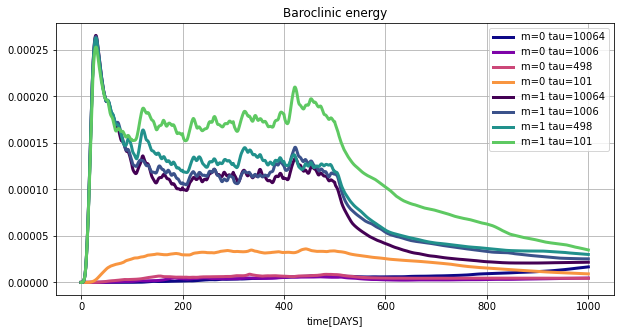

In [46]:
# quickly look at energies
fig, ax = plt.subplots(figsize=(10,5))
for r, name, c in zip(R, labels, colors):
    bc_ke = r.stats['KINETIC_ENRG'] - r.stats['BTKIN_ENRG']
    bc_ke.plot(ax=ax, color=c, lw=3., label=name)
    #.plot(ax=ax, lw=3., color=c, ls='--', label=name)
    # ax.get_lines()[-1].get_color()
ax.legend()
ax.grid()
ax.set_title('Baroclinic energy')

Text(0.5, 1.0, 'Relative enstrophy')

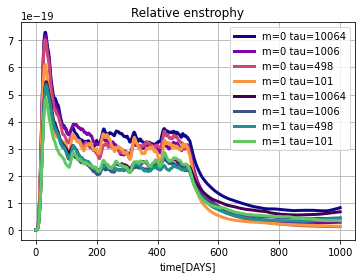

In [47]:
# quickly look at enstrophy
fig, ax = plt.subplots()
for r, name, c in zip(R, labels, colors):
    r.stats['ENSTROPHY'].plot(ax=ax, color=c, lw=3., label=name)
ax.legend()
ax.grid()
ax.set_title('Relative enstrophy')

---

In [48]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
